In [118]:
pip install scikit_posthocs

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp
from scipy.stats import wilcoxon, shapiro, levene, mannwhitneyu
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [120]:

features = pd.read_csv("ai_productivity_features.csv")
targets = pd.read_csv("ai_productivity_targets.csv")

merged = pd.merge(
    features,
    targets,
    on="Employee_ID",
    how="inner"
)
merged.to_csv("ai_productivity_merged.csv", index=False)
df = pd.read_csv("ai_productivity_merged.csv")

In [121]:
# Osnovne informacije
print("Broj redaka i stupaca:", df.shape)
print("Veličina uzorka: ",len(df))
print("\nTipovi varijabli:")
print(df.dtypes)

# Provjera nedostajućih vrijednosti
print("\nNedostajuće vrijednosti:")
print(df.isnull().sum())

# Razdvajanje varijabli
numericke = df.select_dtypes(include=np.number).columns
kategorijske = df.select_dtypes(exclude=np.number).columns

print("\nNumeričke varijable:", list(numericke))
print("Kategorijske varijable:", list(kategorijske))

Broj redaka i stupaca: (4500, 17)
Veličina uzorka:  4500

Tipovi varijabli:
Employee_ID                      object
job_role                         object
experience_years                  int64
ai_tool_usage_hours_per_week    float64
tasks_automated_percent         float64
manual_work_hours_per_week      float64
learning_time_hours_per_week    float64
deadline_pressure_level          object
meeting_hours_per_week          float64
collaboration_hours_per_week    float64
error_rate_percent              float64
task_complexity_score             int64
focus_hours_per_day             float64
work_life_balance_score         float64
burnout_risk_score              float64
productivity_score              float64
burnout_risk_level               object
dtype: object

Nedostajuće vrijednosti:
Employee_ID                     0
job_role                        0
experience_years                0
ai_tool_usage_hours_per_week    0
tasks_automated_percent         0
manual_work_hours_per_week      0


Tipovi podataka koji se pojavljuju su integer, float i object(kategorijska varijabla)

Nema nedostajućih vrijednosti pa nema potreba za dodatnom obradom podataka ili nadomještanjem vrijednosti

In [122]:
df.drop_duplicates()

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,19,11.8,28.5,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00,81.0,High
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,8.0,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,05acc22b-86b7-4aa4-9b80-33b3c77a5b82,Developer,18,4.9,15.2,30.3,3.3,Low,1.4,8.1,0.10,3,8.0,6.8,5.80,93.9,Medium
4496,338e2ff5-8be0-48de-8abb-98c72f5648b3,Writer,17,20.9,49.8,10.0,2.6,High,3.1,10.6,0.10,1,5.7,4.5,10.00,81.7,High
4497,249bce23-5c4b-4671-8239-1e121109a680,Manager,7,4.8,21.1,21.0,0.6,Low,7.2,6.6,3.97,6,3.6,7.8,5.08,60.6,Medium
4498,ffc95b77-3960-4b40-908f-1275ba5bbf91,Analyst,20,6.9,12.3,28.6,1.3,Medium,8.3,8.2,0.94,6,4.5,3.6,9.83,69.8,High



Opisna statistika:
        productivity_score burnout_risk_level  ai_tool_usage_hours_per_week  \
count          4500.000000               4500                   4500.000000   
unique                 NaN                  3                           NaN   
top                    NaN               High                           NaN   
freq                   NaN               3303                           NaN   
mean             64.946600                NaN                     10.349667   
std              14.297129                NaN                      5.808240   
min              20.500000                NaN                      0.000000   
25%              54.975000                NaN                      6.000000   
50%              64.800000                NaN                      9.700000   
75%              74.900000                NaN                     14.300000   
max             100.000000                NaN                     30.400000   

        work_life_balance_score

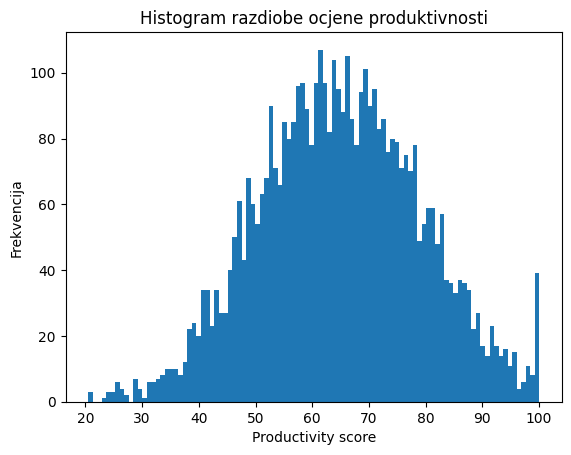

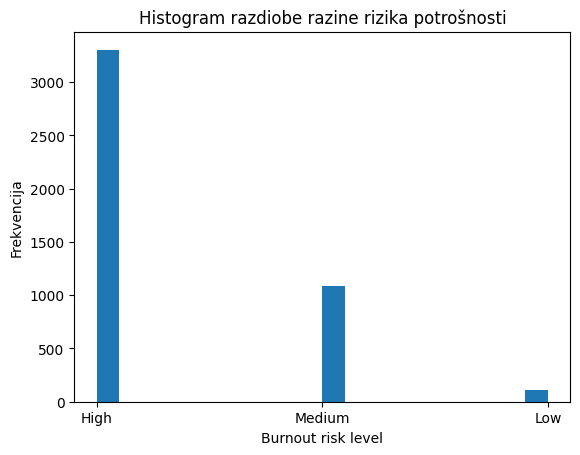

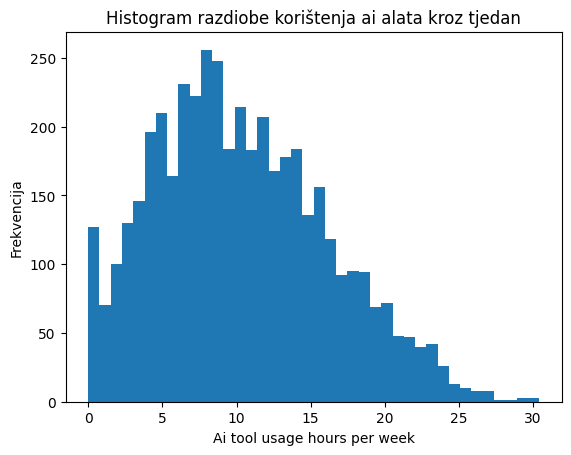

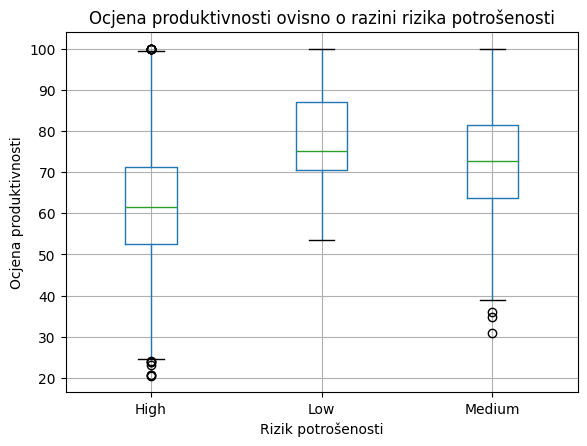

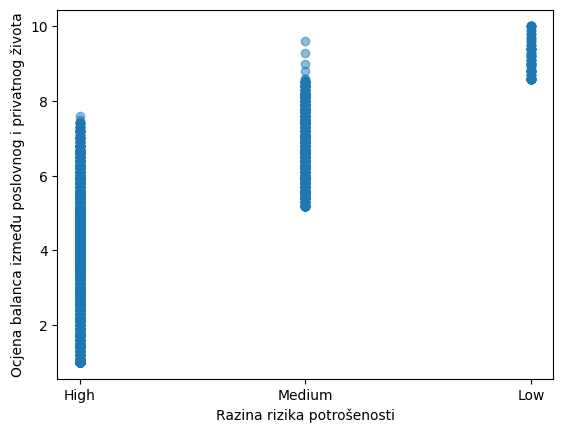

In [139]:

df_chosen = ["productivity_score", "burnout_risk_level", "ai_tool_usage_hours_per_week", "work_life_balance_score"]


print("\nOpisna statistika:")
print(df[df_chosen].describe(include="all"))


print("\nModovi:")
for col in df_chosen:
    print(col, ":", df[col].mode().values)


plt.figure()
plt.hist(df["productivity_score"], bins=100)
plt.title("Histogram razdiobe ocjene produktivnosti")
plt.xlabel("Productivity score")
plt.ylabel("Frekvencija")
plt.show()

plt.figure()
plt.hist(df["burnout_risk_level"], bins=20)
plt.title("Histogram razdiobe razine rizika potrošnosti")
plt.xlabel("Burnout risk level")
plt.ylabel("Frekvencija")
plt.show()

plt.figure()
plt.hist(df["ai_tool_usage_hours_per_week"], bins=40)
plt.title("Histogram razdiobe korištenja ai alata kroz tjedan")
plt.xlabel("Ai tool usage hours per week")
plt.ylabel("Frekvencija")
plt.show()

df.boxplot(column="productivity_score", by="burnout_risk_level")
plt.title("Ocjena produktivnosti ovisno o razini rizika potrošenosti")
plt.suptitle("")
plt.xlabel("Rizik potrošenosti")
plt.ylabel("Ocjena produktivnosti")
plt.show()

plt.figure()
plt.scatter(df['burnout_risk_level'], df['work_life_balance_score'], alpha=0.5)
plt.xlabel("Razina rizika potrošenosti")
plt.ylabel("Ocjena balanca između poslovnog i privatnog života")
plt.show()

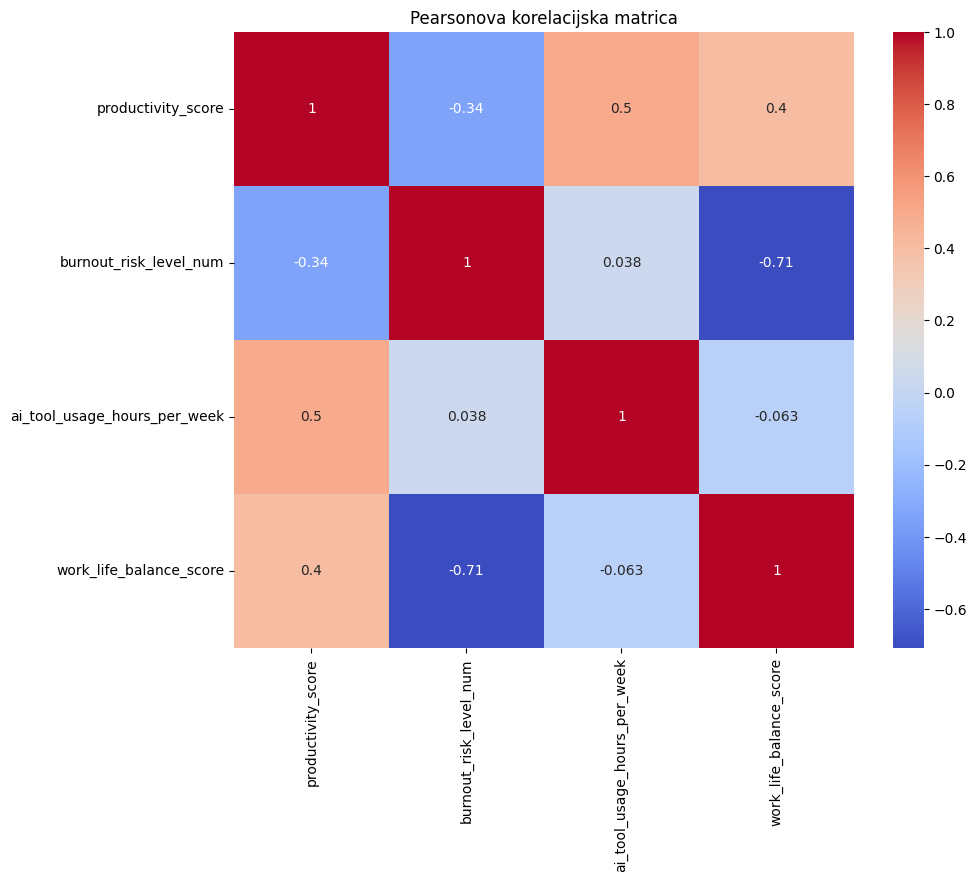

In [141]:
df["burnout_risk_level_num"] = df["burnout_risk_level"].map({"Low":1,"Medium":2,"High":3})

corr_pearson = df[["productivity_score",
                   "burnout_risk_level_num",
                   "ai_tool_usage_hours_per_week",
                   "work_life_balance_score"]].corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title("Pearsonova korelacijska matrica")
plt.show()

In [125]:
#Ispitivanje normalnosti distribucije (Shapiro-Wilk test)
# Shapiro-Wilk test normalnosti
productivity_shapiro = shapiro(df["productivity_score"])
ai_tool_usage_shapiro = shapiro(df["ai_tool_usage_hours_per_week"])

print("Shapiro productivity :", productivity_shapiro.pvalue)
print("Shapiro ai_tool_usage:", ai_tool_usage_shapiro.pvalue)
# Ako je p < 0.05 → distribucija NIJE normalna => Mann-Whitney U test
# Ako je p > 0.05 → distribucija je normalna => t-test

Shapiro productivity : 9.164737971625897e-06
Shapiro ai_tool_usage: 1.2614157911365615e-24


In [126]:

# 1) Kontingencijska tablica: redovi = job_role, stupci = deadline_pressure_level
observed = pd.crosstab(df["job_role"], df["deadline_pressure_level"])

# 2) Chi-square test
chi2_stat, p, df_chi, expected = chi2_contingency(observed)

print("Chi-square:", chi2_stat)
print("p-vrijednost:", p)

if p < 0.05:
    print("Odbacujemo nul hipotezu (postoji povezanost).")
else:
    print("Ne odbacujemo nul hipotezu (nema dokaza o povezanosti).")


Chi-square: 10.076598220706947
p-vrijednost: 0.43379897360733133
Ne odbacujemo nul hipotezu (nema dokaza o povezanosti).


Kod chi-sq testa smo prvo računali frekvencije podataka po job_role i deadline_pressure_level, te grupirali u jednu matricu

Možemo zaključiti da ne postoji statistički značajna razlika između stvarnih i očekivanih frekvencija vezanih uz job_role i deadline_pressure_level


2.5163138212058033e-281
Postoji značajna linearna veza između ocjene produktivnosti zaposlenika i ukupnog korištenja ai alata kroz tjedan(odbacujemo nultu hipotezu).


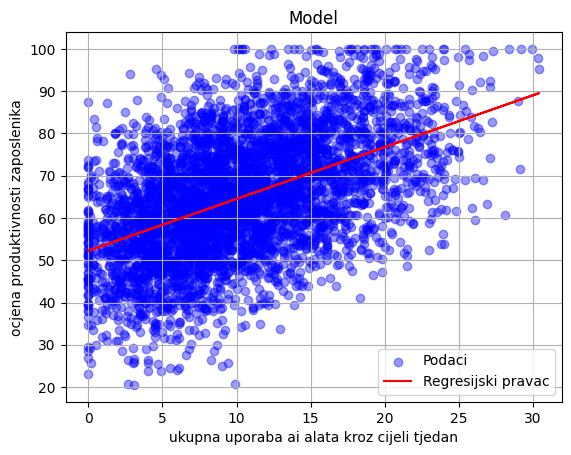

In [127]:
#Linearna regresija
# Odabir varijabli productivity_score - ocjena produktivnosti zaposlenika, zavisna varijabla y
# ai_tool_usage_hours_per_week - ukupna uporaba ai alata kroz cijeli tjedan, nezavisna varijabla x

slope, intercept, r_value, p_value, std_err = stats.linregress(df["ai_tool_usage_hours_per_week"], df["productivity_score"])
intercept_err = stats.linregress(df["ai_tool_usage_hours_per_week"], df["productivity_score"]).intercept_stderr
print(p_value)

if p_value < 0.05:
    print("Postoji značajna linearna veza između ocjene produktivnosti zaposlenika i ukupnog korištenja ai alata kroz tjedan(odbacujemo nultu hipotezu).")
else:
    print("Nema dovoljno dokaza za postojanje značajne linearne veze između ocjene produktivnosti zaposlenika i ukupnog korištenja ai alata kroz tjedan(ne odbacujemo nultu hipotezu).")

# Dodavanje regresijskog pravca

y_pred = intercept + slope * df["ai_tool_usage_hours_per_week"]

plt.scatter(df["ai_tool_usage_hours_per_week"], df["productivity_score"], color='blue', label='Podaci', alpha=0.4)
plt.plot(df["ai_tool_usage_hours_per_week"], y_pred, color='red', label='Regresijski pravac')
plt.xlabel('ukupna uporaba ai alata kroz cijeli tjedan')
plt.ylabel('ocjena produktivnosti zaposlenika')
plt.title('Model')
plt.legend()
plt.grid()
plt.show()

In [128]:
print("Model\n")
print(f"Nagib (slope): {slope:.4f}")
print(f"Značenje nagiba: Ocjena zaposlnika se prosječno promjeni za {slope:.4f} za svako povećanje korištenja ai alata za 1 jedinicu.")
print(f"Odsječak (intercept): Kada je vrijeme upotrebe ai alata kroz cijeli tjedan 0, onda je ocjena zaposlenika približno {intercept:.4f}")
print(f"R^2: {r_value**2:.4f}")
print("R^2 govori koliki postotak varijance u Y se može objasniti X-om, u ovom slučaju malo.")
print(f"Jednadžba: yB = {intercept:.4f} + {slope:.4f}*x2")

Model

Nagib (slope): 1.2270
Značenje nagiba: Ocjena zaposlnika se prosječno promjeni za 1.2270 za svako povećanje korištenja ai alata za 1 jedinicu.
Odsječak (intercept): Kada je vrijeme upotrebe ai alata kroz cijeli tjedan 0, onda je ocjena zaposlenika približno 52.2480
R^2: 0.2485
R^2 govori koliki postotak varijance u Y se može objasniti X-om, u ovom slučaju malo.
Jednadžba: yB = 52.2480 + 1.2270*x2


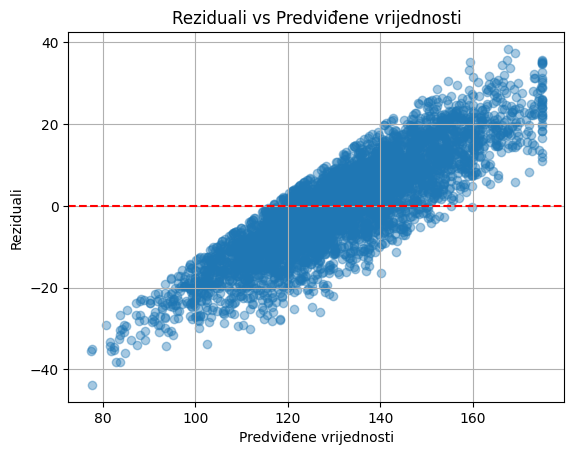

Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.


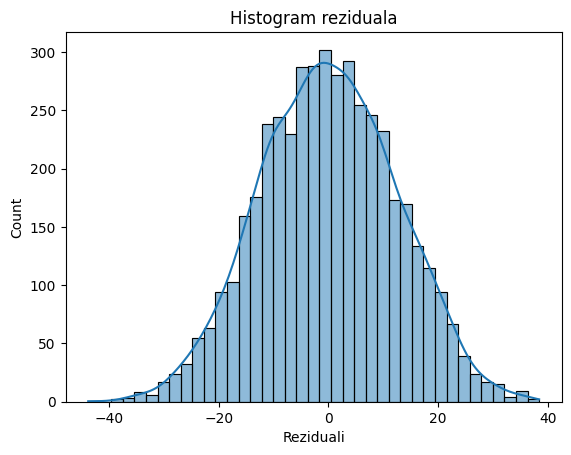

Vrijednosti reziduala je blizu normalne distribucije.


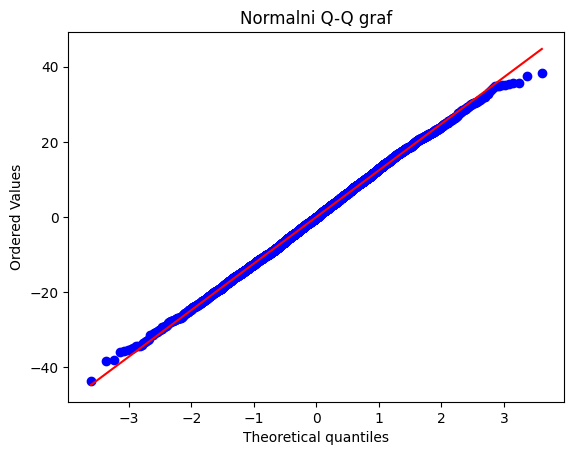

Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju.


In [129]:
# Reziduali
residuals = df['productivity_score'] - (intercept + slope * df['ai_tool_usage_hours_per_week'])
fitted_values = intercept + slope * df['productivity_score']

plt.scatter(fitted_values, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.grid()
plt.show()
print("Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.")

sns.histplot(residuals, kde=True)
plt.xlabel('Reziduali')
plt.title('Histogram reziduala')
plt.show()
print("Vrijednosti reziduala je blizu normalne distribucije.")


plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normalni Q-Q graf')
plt.show()
print("Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju.")



In [130]:
#Odabir testa (t-test za nezavisne uzorke ili Mann–Whitney U test) ovisno o zadovoljenju pretpostavki.
# Mann-Whitney U test (neparametrijski)
u_stat, p_val = mannwhitneyu(df["productivity_score"], df["ai_tool_usage_hours_per_week"])

print("Mann-Whitney U statistika:", u_stat)
print("p-vrijednost:", p_val)


Mann-Whitney U statistika: 20248564.5
p-vrijednost: 0.0


Vidimo da je p<0.05 pa možemo zaključiti da postoji statistički značajna razlika u distribucijama varijabli productivity_score i ai_tool_usage_hours_pr_week

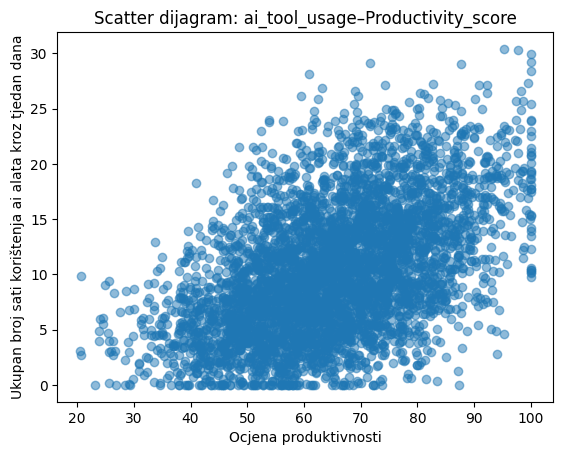

In [131]:
df = pd.read_csv("ai_productivity_merged.csv", delimiter=",")
plt.scatter(df["productivity_score"], df["ai_tool_usage_hours_per_week"], alpha=0.5)
plt.xlabel("Ocjena produktivnosti")
plt.ylabel("Ukupan broj sati korištenja ai alata kroz tjedan dana")
plt.title("Scatter dijagram: ai_tool_usage–Productivity_score")
plt.show()

# Interpretacija:
# povećanjem korištenja ai alata raste produktivnost

In [132]:
#Budući da distribucija varijable prema Shapiro–Wilk testu
#odstupa od normalne, ali je veličina uzorka relativno velika (n = 4500)
#i populacijska standardna devijacija nije poznata, za izračun 95% intervala
#povjerenja za srednju vrijednost koristi se t‑distribucija
#t - distribucija

confidence_level = 0.95
lower_bound, upper_bound = stats.t.interval(confidence_level, 76 - 1, loc=np.mean(df["productivity_score"]), scale=stats.sem(df["productivity_score"]))
print(f"95% interval povjerenja za ocjenu produktivnosti (neparametarski): [{lower_bound:.2f}, {upper_bound:.2f}]")

95% interval povjerenja za ocjenu produktivnosti (neparametarski): [64.52, 65.37]


Ako kažemo da je 95% interval povjerenja za ocjenu produktivnosti [64.52, 65.37], to znači da smo 95% sigurni da se
stvarna prosječna ocjena produktivnosti nalazi unutar tog raspona.

In [133]:
confidence_level = 0.95
lower_bound, upper_bound = stats.t.interval(confidence_level, 76 - 1, loc=np.mean(df["ai_tool_usage_hours_per_week"]), scale=stats.sem(df["ai_tool_usage_hours_per_week"]))
print(f"95% interval povjerenja za ukupni broj sati korištenja ai alata kroz tjedan (neparametarski): [{lower_bound:.2f}, {upper_bound:.2f}]")

95% interval povjerenja za ukupni broj sati korištenja ai alata kroz tjedan (neparametarski): [10.18, 10.52]


Ako kažemo da je 95% interval povjerenja za broj sati korištenja ai alata kroz tjedan[10.18, 10.52], to znači da smo 95% sigurni da se
stvarna prosječna vrijednost broja sati korištenja ai alata kroz tjedan nalazi unutar tog raspona.

In [144]:
# Grupiranje podataka
groups = [
    group["productivity_score"].values
    for name, group in df.groupby("ai_usage_grupa")
]

broj = 0;

# Shapiro–Wilk test
print("\nShapiro–Wilk test normalnosti:")
for name, group in df.groupby("ai_usage_grupa"):
    stat, p = stats.shapiro(group["productivity_score"])
    print(f"{name}: W={stat:.3f}, p={p:.4f}")

# Leveneov test
levene_stat, levene_p = stats.levene(*groups)
print("\nLeveneov test homogenosti varijanci:")
print(f"Statistika={levene_stat:.3f}, p={levene_p:.4f}")


Shapiro–Wilk test normalnosti:
1: W=0.998, p=0.6180
2: W=0.999, p=0.0643
3: W=0.989, p=0.0000

Leveneov test homogenosti varijanci:
Statistika=1.329, p=0.2647


Za jednu grupu  grupe ukupnoga broja sati korištenja ai alata Shapiro–Wilk test pokazuje statistički značajno odstupanje od normalne distribucije (p < 0.05). Stoga se odbacuje nulta hipoteza o normalnosti podataka, što potvrđuje da pretpostavke parametrijskih testova nisu zadovoljene.

Leveneov test pokazuje kako je homoskedastičnost kod odabranih variajbli zadovoljena (p>0.05)

In [143]:
# Kruskal-Wallis test

kruskal_stat, kruskal_p = stats.kruskal(*groups)

print(f"Statistika= {kruskal_stat:.3f}, p= {kruskal_p:.4f}")

#Dunn post-hoc

posthoc = sp.posthoc_dunn(groups, p_adjust = 'holm')
print(posthoc < 0.05)


Statistika= 852.486, p= 0.0000
       1      2      3
1  False   True   True
2   True  False   True
3   True   True  False


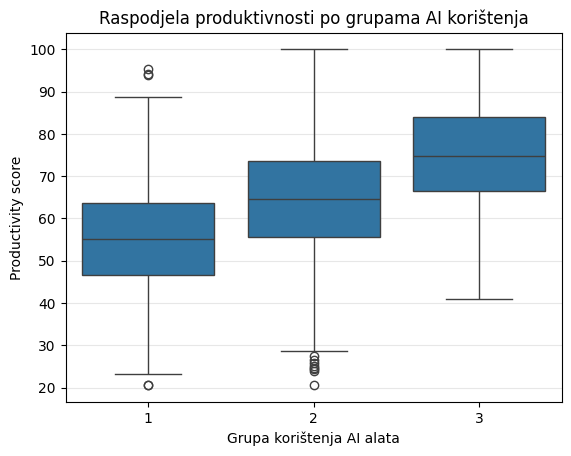

In [146]:
# Boxplot productivity_score po ai_usage_grupa
sns.boxplot(x="ai_usage_grupa", y="productivity_score", data=df)
plt.xlabel("Grupa korištenja AI alata")
plt.ylabel("Productivity score")
plt.title("Raspodjela produktivnosti po grupama AI korištenja")
plt.grid(axis="y", alpha=0.3)
plt.show()

Kruskal–Wallis test pokazuje statistički značajnu razliku ocjene produktivnosti između barem jedne grupe ukupnog broja sati korištenja ai alata(p < 0.05). Time se odbacuje nulta hipoteza da sve grupe imaju jednake ocjene produktivnosti.

Post-hoc Dunn test s Holm korekcijom pokazuje da statistički značajna razlika u ukupnom broju sati korištenja ai alata postoji između niske-srednje, niske-visoke, srednje-niske,srednje-visoke, visoke-niske,visoke-srednje, dok razlike između ostalih parova grupa nisu statistički značajne.

<Figure size 640x480 with 0 Axes>

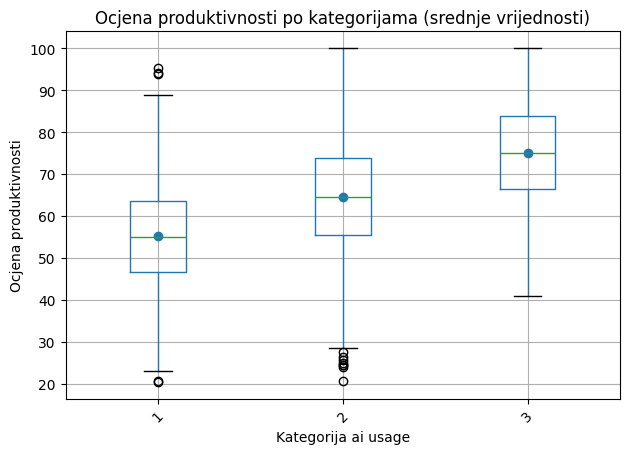

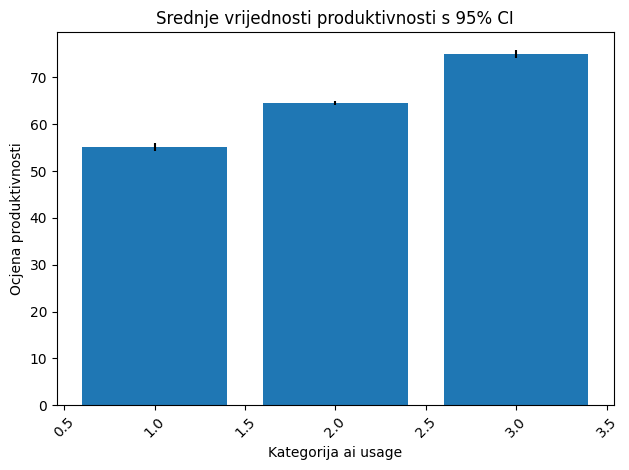

In [135]:
def grupa_ai(x):
    if x < 5:
        return 1
    elif x <= 15:
        return 2
    else:
        return 3

df["ai_usage_grupa"] = df["ai_tool_usage_hours_per_week"].apply(grupa_ai)


# Boxplot sa srednjim vrijednostima
plt.figure()
df.boxplot(column="productivity_score", by="ai_usage_grupa", rot=45)
means = df.groupby("ai_usage_grupa")["productivity_score"].mean()
plt.plot(range(1, len(means) + 1), means.values, marker="o", linestyle="")
plt.title("Ocjena produktivnosti po kategorijama (srednje vrijednosti)")
plt.suptitle("")
plt.xlabel("Kategorija ai usage")
plt.ylabel("Ocjena produktivnosti")
plt.tight_layout()
plt.show()

# Bar chart sa 95% intervalom pouzdanosti
means = df.groupby("ai_usage_grupa")["productivity_score"].mean()
sems = df.groupby("ai_usage_grupa")["productivity_score"].sem() #standardna pogreška aritmetričke sredine

plt.figure()
plt.bar(means.index, means.values, yerr=1.96 * sems.values)
plt.xticks(rotation=45)
plt.title("Srednje vrijednosti produktivnosti s 95% CI")
plt.xlabel("Kategorija ai usage")
plt.ylabel("Ocjena produktivnosti")
plt.tight_layout()
plt.show()